In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import get_combine_data
import heatmap
import position_view

In [2]:
all_data = get_combine_data.get_data(position_key='general_position')

In [3]:
draft_pos_corr = get_combine_data.most_corr_with_draft_pos(all_data)

In [4]:
heatmap_viz = heatmap.get_heatmap(draft_pos_corr)

In [5]:
heatmap_viz

alt.LayerChart(...)

In [6]:
last_n_years = all_data[(all_data.CombineYear >= 2015)]# & (all_data.CombineYear < 2020)]
draft_pos_last_n = get_combine_data.most_corr_with_draft_pos(last_n_years)
after_2015 = heatmap.get_heatmap(draft_pos_last_n, " 2015-2025")
after_2015.save("after_2015.html")

after_2015

alt.LayerChart(...)

In [7]:
last_n_years = all_data[(all_data.CombineYear < 2015)]# & (all_data.CombineYear < 2020)]
draft_pos_last_n = get_combine_data.most_corr_with_draft_pos(last_n_years)
before_2015 = heatmap.get_heatmap(draft_pos_last_n, " 2000-2014")
before_2015.save("before_2015.html")

before_2015

alt.LayerChart(...)

In [8]:
rp = position_view.relative_performance(all_data)

In [9]:
rp

alt.Chart(...)

who are the top 10 running backs by 40 yard time?

In [10]:
rp.save("position_view_2025.html")

In [11]:
rbs = all_data[all_data.Pos == "RB"]

In [12]:
top10_rbs = rbs[rbs.yr < "2015"].sort_values("40yd", ascending=True)[:10]

In [13]:
top10_rbs[["Player", "yr", "40yd"]]

,Player,yr,40yd
2815,Chris Johnson,2008,4.24
2854,Darren McFadden,2008,4.33
3807,Taiwan Jones,2011,4.33
3231,Cedric Peerman,2009,4.34
3591,Ben Tate,2010,4.34
4192,Lamar Miller,2012,4.34
3340,Jahvid Best,2010,4.34
1050,Justin Fargas,2003,4.35
4128,LaMichael James,2012,4.35
356,Derrick Blaylock,2001,4.36


In [14]:
all_data.columns

Index(['Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)', 'CombineYear',
       'tm', 'rnd', 'pick', 'yr', 'DraftNumber', 'general_position', 'q_40yd',
       'q_Vertical', 'q_Bench', 'q_Broad Jump', 'q_3Cone', 'q_Shuttle',
       'pos_d_40yd', 'pos_d_Vertical', 'pos_d_Bench', 'pos_d_Broad Jump',
       'pos_d_3Cone', 'pos_d_Shuttle', 'composite_score'],
      dtype='object')

In [111]:
## trash
eby = all_data.groupby(["CombineYear"])[events].mean()

In [112]:
eby['Year'] = eby.index


In [107]:
mel = eby.melt("Year")

In [113]:
mel.rename(columns={"variable": "event"}, inplace=True)

mel

,Year,event,value
0,2000,40yd,4.784121
1,2001,40yd,4.794854
2,2002,40yd,4.747214
3,2003,40yd,4.781121
4,2004,40yd,4.782511
...,...,...,...
151,2021,Shuttle,4.371631
152,2022,Shuttle,4.528533
153,2023,Shuttle,4.448333
154,2024,Shuttle,4.386909


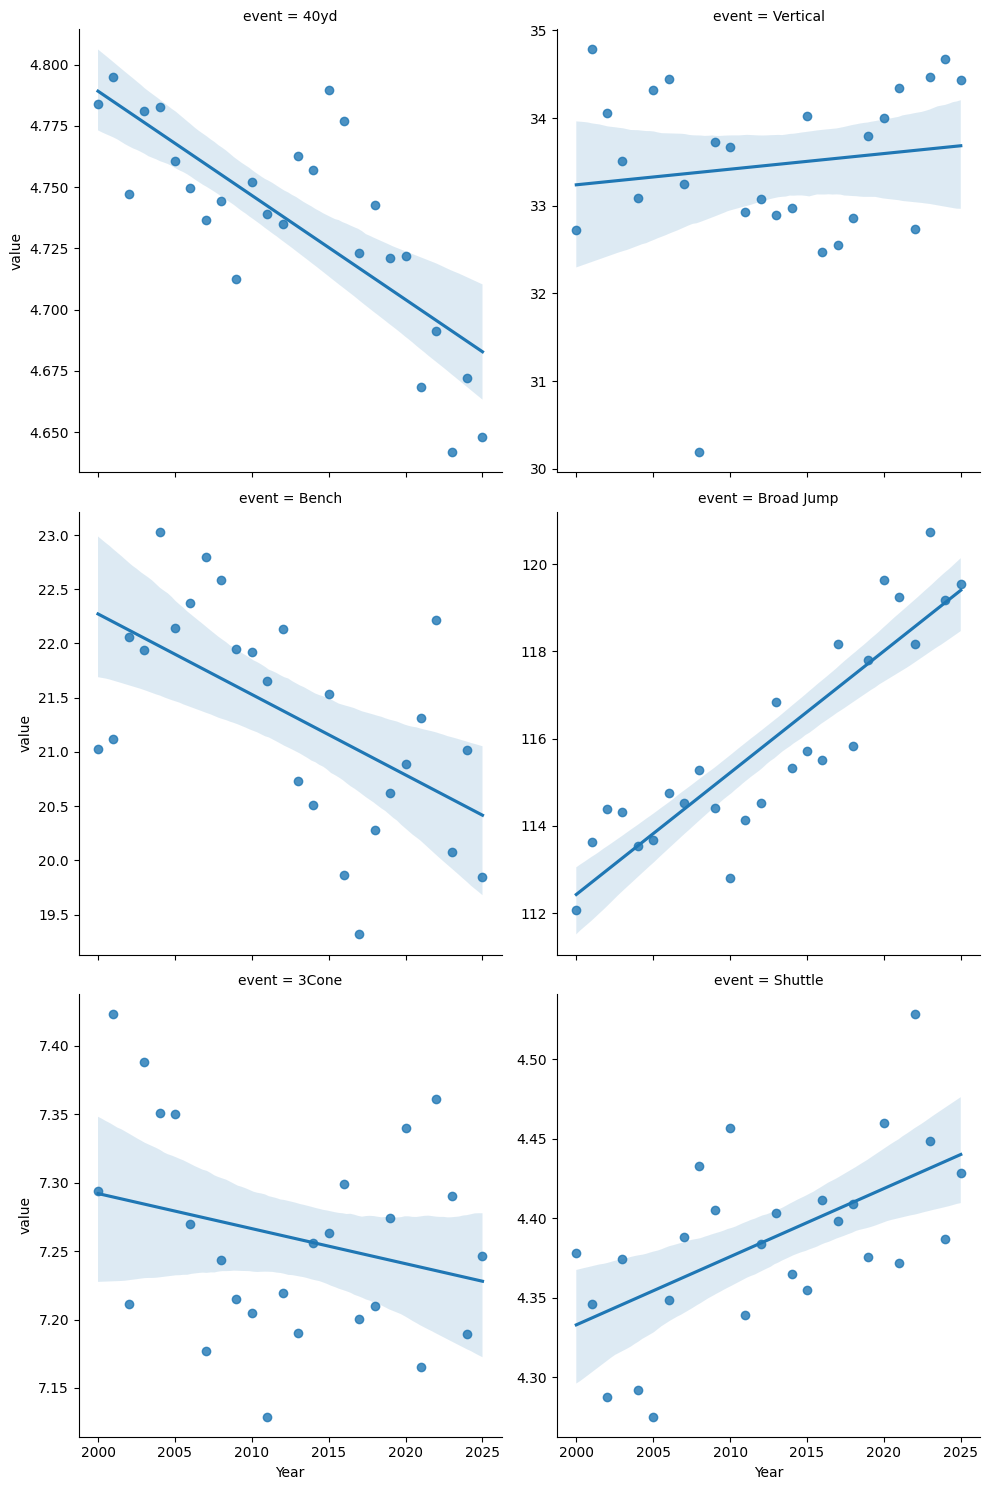

In [ ]:
sns.lmplot(mel, x="Year", y="value", col="event", col_wrap=2, 
           facet_kws={'sharey': False, 'sharex': True})

In [84]:
eby.unstack()

         CombineYear
40yd     2000           4.784121
         2001           4.794854
         2002           4.747214
         2003           4.781121
         2004           4.782511
                          ...   
Shuttle  2021           4.371631
         2022           4.528533
         2023           4.448333
         2024           4.386909
         2025           4.428519
Length: 156, dtype: float64

In [81]:
eby.melt(id_vars="CombineYear")

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['CombineYear']"

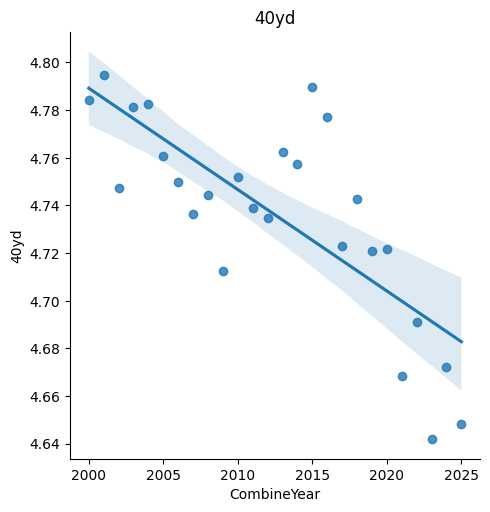

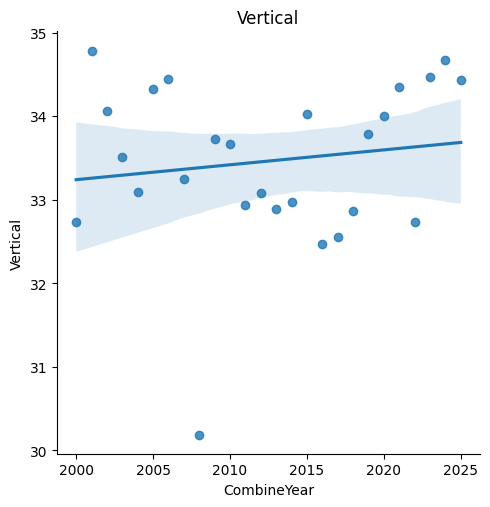

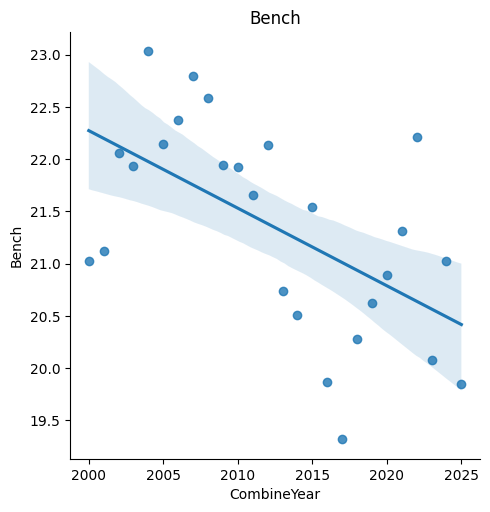

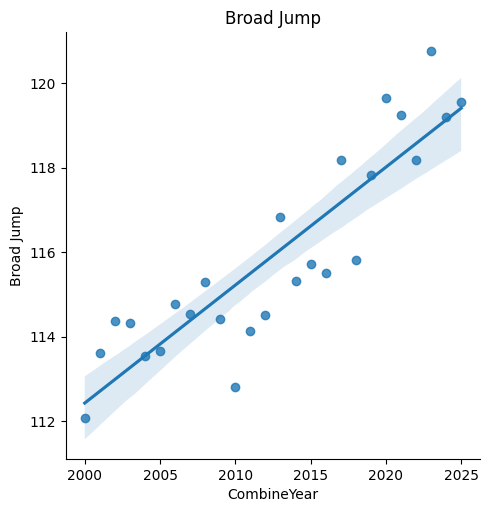

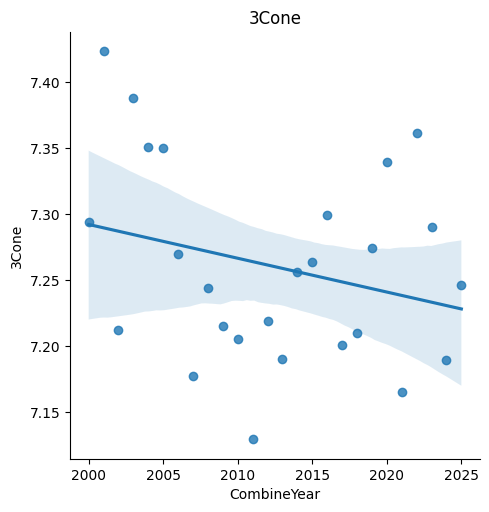

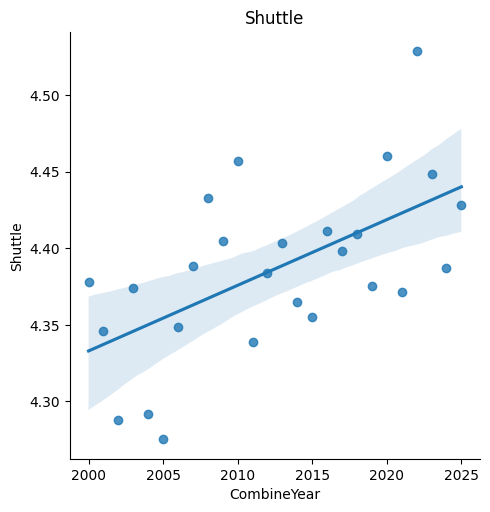

In [73]:
#fix, axs = plt.subplots(6)


events = ["40yd", "Vertical", "Bench", "Broad Jump", "3Cone", "Shuttle"]
counter = 0
for event in events:
    exercise_by_year = all_data.groupby(["CombineYear"])[event].mean()
    df_by_year = pd.DataFrame(exercise_by_year).reset_index()

    ## seaborn will give complaints about data type otherwise
    df_by_year['year'] = df_by_year["CombineYear"].astype("int")

    #plt.subplot(6,1, counter+1)
    sns.lmplot(df_by_year, x="CombineYear", y=event).set(title=f"{event}")

    counter += 1

    #print(graph)

plt.show()